In [1]:
from multirotor import MultiRotor
from pid import PIDController

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
def evaluate(pid_params):
    """Evaluate the PID parameters on the multirotor device.
    
    Args:
        pid_params is a sequence of six values
        pid_params[0] (float): pid proportional gain
        pid_params[1] (float): pid integrative gain
        pid_params[2] (float): pid derivative gain
        pid_params[3] (float): pid maximum integral windup constant
        pid_params[4] (float): pid derative smoothing factor
        pid_params[5] (float): pid maximum output value
    """

    # Simulation timing
    time_start = 0
    time_stop = 30
    num_time_points = 1000
    time = np.linspace(time_start, time_stop, num_time_points)
    time_step = time[1] - time[0]

    # Create the simulated multirotor
    copter = MultiRotor(dt=time_step)

    # Create the PID controller
    pid = PIDController(kp=pid_params[0],
                        ki=pid_params[1],
                        kd=pid_params[2],
                        windup=pid_params[3],
                        alpha=pid_params[4],
                        u_bounds=[0, pid_params[5]])

    # Altitude target (setpoint) is up 10m
    altitude_setpoint = copter.get_altitude() + 10

    # Simulate
    sim_data = []
    for t in time:
        effort = pid.step(altitude_setpoint, copter.get_altitude())
        state = copter.step(effort)
        sim_data.append((t, effort, *state, altitude_setpoint))

    # Retrun simulation data as a data frame
    return pd.DataFrame(
        sim_data, columns=["Time", "Effort", "Altitude", "Speed", "Setpoint"])

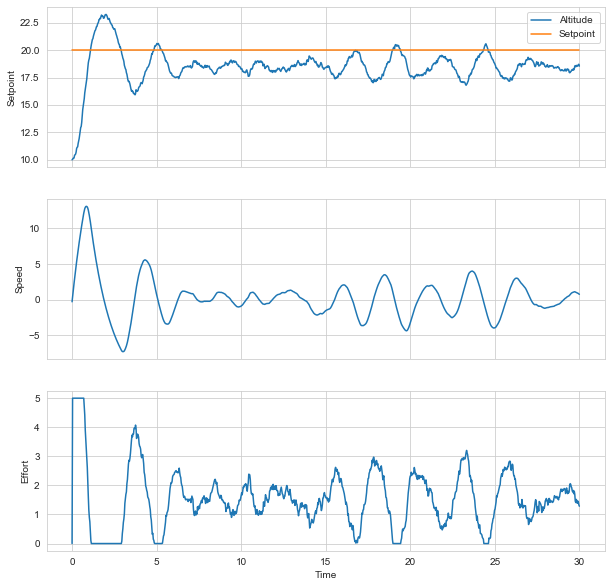

In [3]:
# Test the simulation
sim_df = evaluate([1, 0, 0, 5, 0.8, 5])

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 10))

sns.lineplot(x="Time", y="Altitude", data=sim_df, ax=axs[0]);
sns.lineplot(x="Time", y="Setpoint", data=sim_df, ax=axs[0]);
axs[0].legend(["Altitude", "Setpoint"])

sns.lineplot(x="Time", y="Speed", data=sim_df, ax=axs[1]);
sns.lineplot(x="Time", y="Effort", data=sim_df, ax=axs[2]);

In [ ]:
# Optimize the PID parameters.
# Think about how you will quantify performance.
# You can make as many calls to evaluate as you'd like.
# You don't need to plot as you optimize.